https://deeptpanchal.medium.com/implementing-k-means-clustering-from-scratch-ed60faace2e6

In [1]:
import random
import math
import matplotlib.pyplot as plt
def read_csv(path, columns):
    header = []
    data = []
    size = 0
    with open(path, 'r') as file:
        header = file.readline().strip().split(',')
        for line in file:
            data.append(line.strip().split(','))
            size += 1
    for i in range(size):
        for j in columns:
            data[i][j] = float(data[i][j])
    return header, data, size

In [2]:
def initialize_centroids(data, columns, size, n_clusters):
    centroids = [[0 for _ in columns] for _ in range(n_clusters)]
    for c_i, d_i in enumerate(random.sample(range(size), n_clusters)):
        for c_j, d_j in enumerate(columns):
            centroids[c_i][c_j] = data[d_i][d_j]
    return centroids

In [3]:
def assign_labels(data, columns, size, centroids):
    labels = [[float('inf'), None] for _ in range(size)]
    for d_index, d_list in enumerate(data):
        for c_index, c_list in enumerate(centroids):
            distance = 0
            for index, value in enumerate(columns):
                distance += (d_list[value]-c_list[index])**2
            squared_distance = math.sqrt(distance)
            if squared_distance < labels[d_index][0]:
                labels[d_index] = [squared_distance, c_index]
    return labels

In [4]:
def update_centroids(data, columns, n_clusters, labels):
    new_centroids = [[0 for _ in columns] for _ in range(n_clusters)]
    count = [0 for _ in range(n_clusters)]
    for d_index, d_list in enumerate(data):
        count[labels[d_index][1]] += 1
        for index, value in enumerate(columns):
            new_centroids[labels[d_index][1]][index] += d_list[value]
    for c_index, c_value in enumerate(new_centroids):
        for index, value in enumerate(c_value):
            new_centroids[c_index][index] /= count[c_index]
    return new_centroids

In [5]:
def calculate_inertia(labels):
    inertia = 0
    for _, value in enumerate(labels):
        inertia += value[0] ** 2
    return inertia

In [6]:
def KMeans(data, columns, size, n_clusters, n_init=30):
    centroids = None
    labels = None
    inertia = float('inf')
    for _ in range(n_init):
        centroids_ = initialize_centroids(data, columns, size, n_clusters)
        try:
            while True:
                labels_ = assign_labels(data, columns, size, centroids_)
                new_centroids = update_centroids(
                    data, columns, n_clusters, labels_)
                if new_centroids == centroids_:
                    break
                centroids_ = new_centroids
            inertia_ = calculate_inertia(labels_)
            if inertia_ < inertia:
                centroids, labels, inertia = centroids_, labels_, inertia_
        except:
            continue
    return centroids, labels, inertia

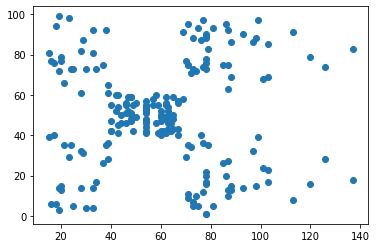

In [7]:
filePath = './Mall_Customers.csv'
columns = [3, 4]
header, data, size = read_csv(filePath, columns)
for d in data:
    plt.scatter(float(d[3]), float(d[4]), color='#1f77b4')
plt.show()

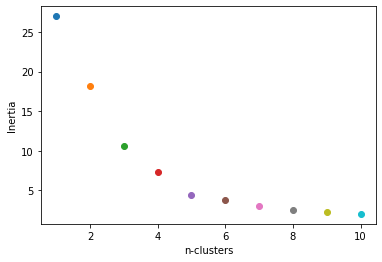

In [8]:
for i in range(1, 11):
    centroids, labels, inertia = KMeans(data, columns, size, i)
    plt.scatter(i, inertia/10000)
plt.xlabel('n-clusters')
plt.ylabel('Inertia')
plt.show()

44448.4554479337
[[25.727272727272727, 79.36363636363636], [88.2, 17.114285714285714], [55.2962962962963, 49.51851851851852], [26.304347826086957, 20.91304347826087], [86.53846153846153, 82.12820512820512]]


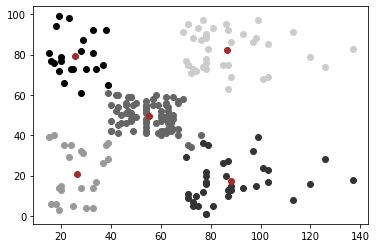

In [9]:
n_clusters = 5
centroids, labels, inertia = KMeans(data, columns, size, n_clusters)
print(inertia)
print(centroids)
for i, d in enumerate(data):
    c = str(round(labels[i][1]/n_clusters, 1))
    plt.scatter(d[3], d[4], color=c)
for c in centroids:
    plt.scatter(c[0], c[1], color='brown')
plt.show()